# Decision Tree :

***Problem Statement :***
- A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
- Approach : A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


***About the data :*** 
Let’s consider a Company dataset with around 10 variables and 400 records. 

The attributes are as follows: 
-  Sales : Unit sales (in thousands) at each location.
-  Competitor Price : Price charged by competitor at each location.
-  Income : Community income level (in thousands of dollars).
-  Advertising : Local advertising budget for company at each location (in thousands of dollars).
-  Population : Population size in region (in thousands).
-  Price : Price company charges for car seats at each site.
-  Shelf Location at stores : A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site.
-  Age : Average age of the local population.
-  Education : Education level at each location.
-  Urban : A factor with levels No and Yes to indicate whether the store is in an urban or rural location.
-  US : A factor with levels No and Yes to indicate whether the store is in the US or not.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report
from sklearn import tree
import matplotlib.image as mpimg
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df=pd.read_csv("Company_Data.csv")
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [5]:
df.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [6]:
df.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


<AxesSubplot:>

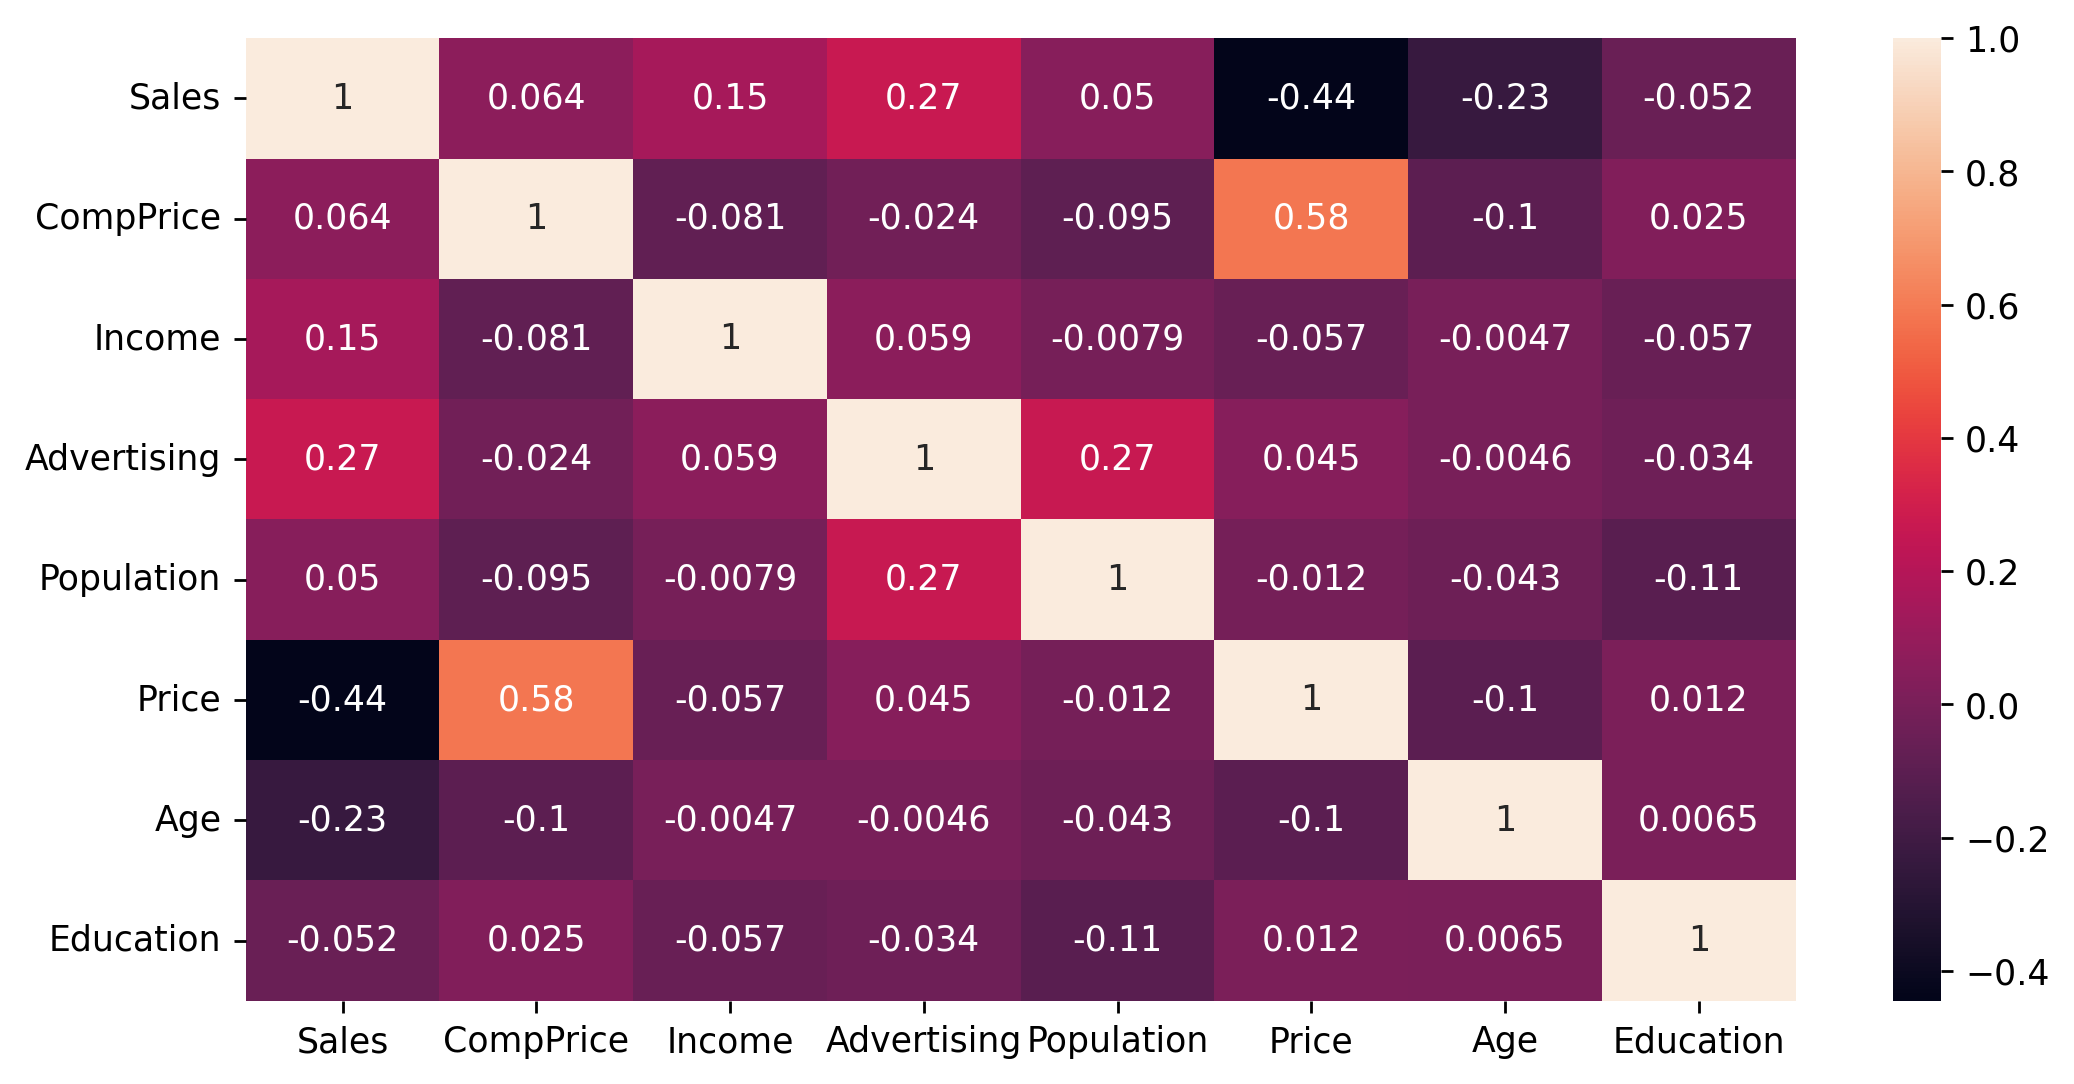

In [7]:
plt.rcParams['figure.figsize'] = [10,5]
plt.rcParams['figure.dpi'] = 250
sns.heatmap(df.corr(),annot=True)

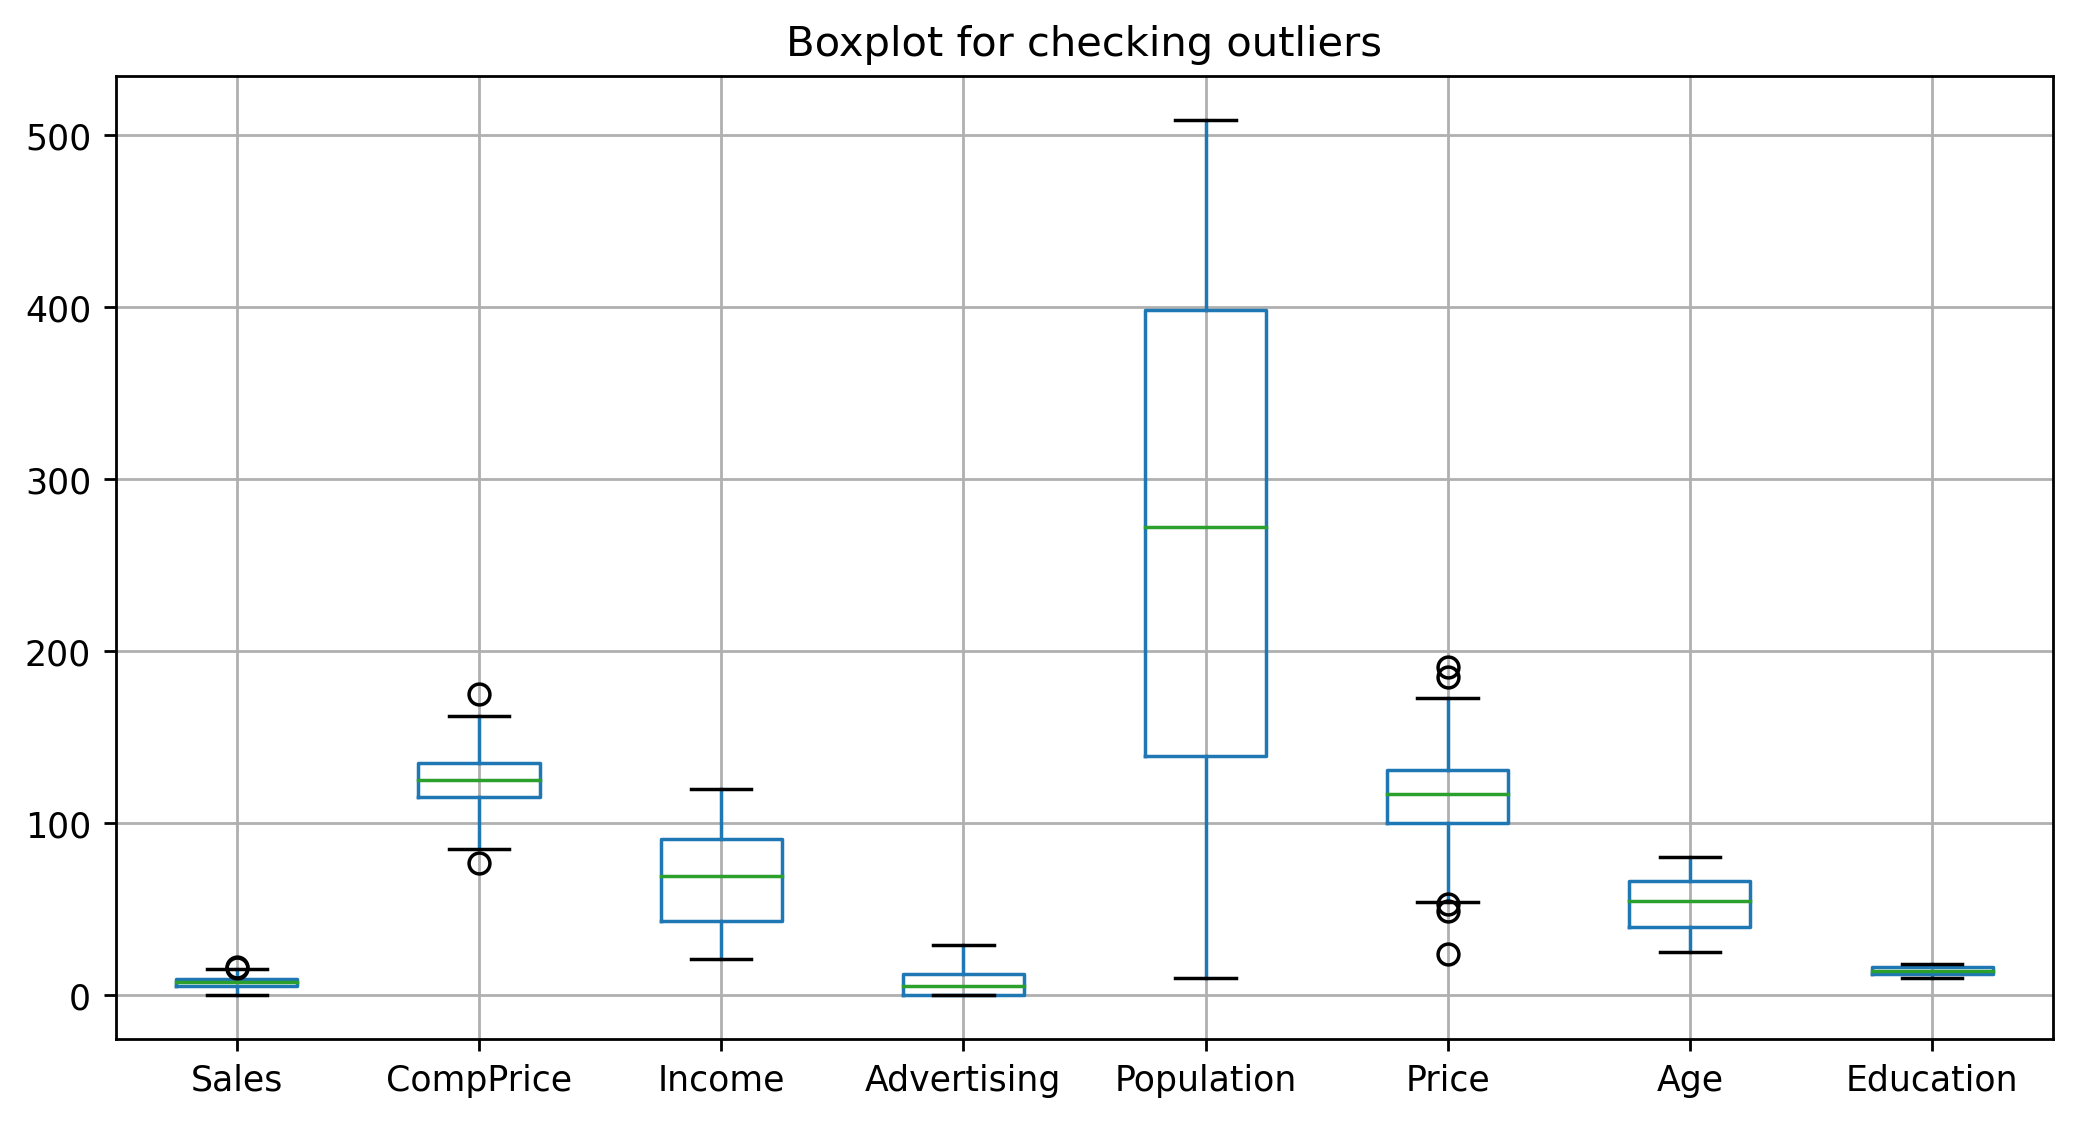

In [8]:
# checking outliers from given dataset
df.boxplot()
plt.title('Boxplot for checking outliers')
plt.show()

In [9]:
# Converting categorical columns into numerical columns 
df = pd.get_dummies(df, columns=['ShelveLoc','Urban','US'])

***Since the target variable is continuous, we create a class of the value based on the mean <= 7.49 == "Small" and > 7.49 == "large"***

In [10]:
df["sales"]="small"
df.loc[df["Sales"]>7.49,"sales"]="large"
df.drop(["Sales"],axis=1,inplace=True)

In [11]:
# Creating independent & dependent variables

x = df.iloc[:,0:14] #Independent variable
y = df.iloc[:,14] #Dependent variable

In [12]:
# Splitting data into training & testing sets

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1,stratify=y)

In [13]:
dt = DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)

In [14]:
print(classification_report(ytest,ypred))
print('Train Accuracy :', dt.score(xtrain,ytrain))
print('Test Accuracy :', dt.score(xtest,ytest))

              precision    recall  f1-score   support

       large       0.76      0.88      0.81        40
       small       0.85      0.72      0.78        40

    accuracy                           0.80        80
   macro avg       0.81      0.80      0.80        80
weighted avg       0.81      0.80      0.80        80

Train Accuracy : 1.0
Test Accuracy : 0.8


***Hyperparameter Tunning :***

In [15]:
params = {
    'criterion' : ["gini", "entropy"],
    'splitter' : ['best','random'],
    'max_depth' : [2,3,4,5,6,7,8,9]
}

In [16]:
grid = GridSearchCV(DecisionTreeClassifier(), param_grid=params)

In [17]:
grid.fit(xtrain,ytrain)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                         'splitter': ['best', 'random']})

In [18]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 8, 'splitter': 'random'}

In [19]:
dt = DecisionTreeClassifier(criterion='gini',max_depth=6,splitter='best')

dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)

In [20]:
print('Training Accuracy :', dt.score(xtrain,ytrain))
print('Testing Accuracy :', dt.score(xtest,ytest))

Training Accuracy : 0.93125
Testing Accuracy : 0.85


***Decision Tree:***

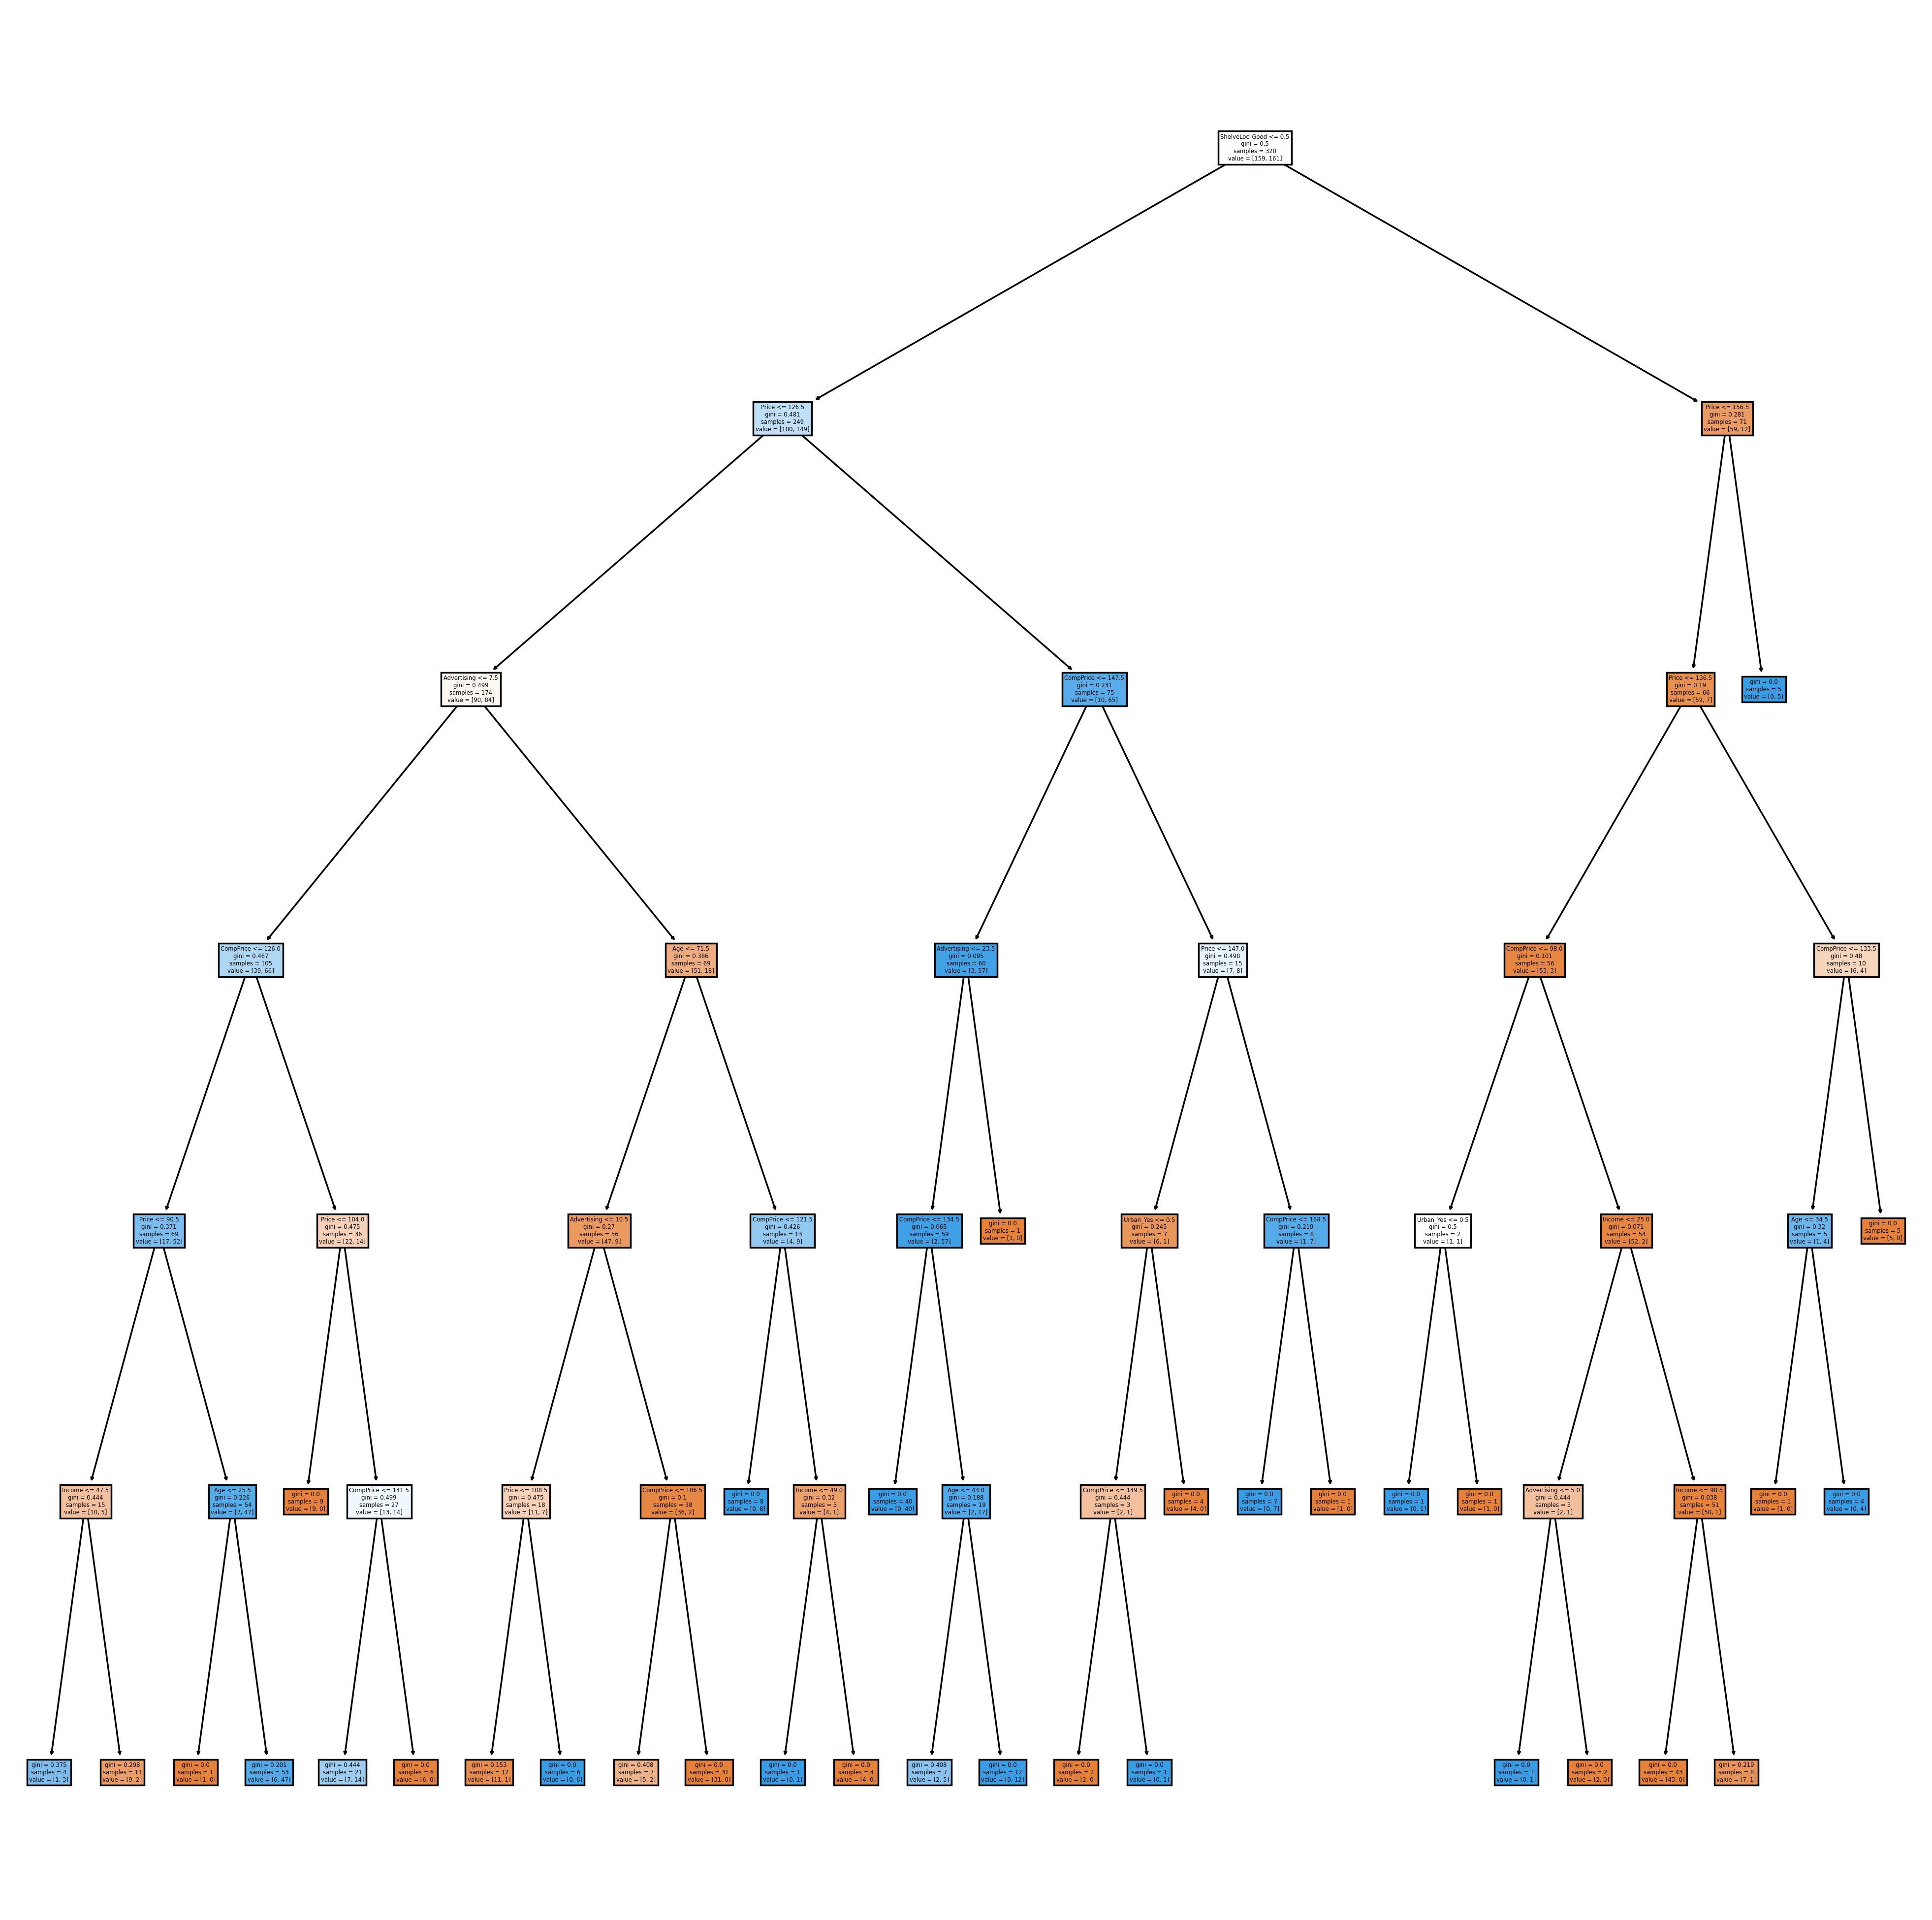

In [21]:
plt.rcParams['figure.figsize']=(20,20)
plt.rcParams['figure.dpi']=250

tree.plot_tree(dt, feature_names=x.columns, filled=True)
plt.show()